# 02. 多量子比特

二量子比特的标准基：
$$|00\rangle,|01\rangle,|10\rangle,|11\rangle$$
其中 $|00\rangle \equiv |0\rangle|0\rangle \equiv |0\rangle \otimes |0\rangle$ 。

> 不像单量子比特对应Bloch球面上的一点，多量子比特并没有一种简单的几何图景。

对于任意矩阵 $X\in \mathbb{C}^{m\times n}, Y\in \mathbb{C}^{p\times q}$，张量积（Kronecker积）定义为
$$
X\otimes Y \equiv
\begin{pmatrix}
x_{11}Y & x_{12}Y & \cdots & x_{1n}Y \\
x_{21}Y & x_{22}Y & \cdots & x_{2n}Y \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_{m1}Y & x_{m2}Y & \cdots & x_{mn}Y
\end{pmatrix} 
\in \mathbb{C}^{(mp)\times (nq)}
$$

因此二量子比特的标准基的矩阵表示如下：

$$\begin{align*}|0\rangle \otimes |0\rangle \equiv \begin{pmatrix}1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix}1 \\ 0 \end{pmatrix} \equiv \begin{pmatrix} 1 \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\ 0 \begin{pmatrix} 1 \\ 0 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} \\ |0\rangle \otimes |1\rangle  \equiv  \begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} \equiv \begin{pmatrix} 1 \begin{pmatrix} 0 \\ 1 \end{pmatrix} \\ 0 \begin{pmatrix} 0 \\ 1 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} \\ |1\rangle \otimes |0\rangle  \equiv  \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} \equiv \begin{pmatrix} 0 \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\ 1 \begin{pmatrix} 1 \\ 0 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} \\ |1\rangle \otimes |1\rangle  \equiv  \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} \equiv \begin{pmatrix} 0 \begin{pmatrix} 0 \\ 1 \end{pmatrix} \\ 1 \begin{pmatrix} 0 \\ 1 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} \\ \end{align*} $$

在mindquantum中，`sim.get_qs(True)` 可以返回量子态，并且用ket表示。

> 需要注意的是，在mindquantum中，量子比特是按照从大到小的顺序排列的 $|q_n, q_{n-1}, \ldots, q_1, q_0\rangle$ 。

In [1]:
from mindquantum.simulator import Simulator
from mindquantum.core.gates import X

sim = Simulator("mqvector", 2)

# |00⟩
sim.reset()
print(sim.get_qs(True), sim.get_qs())

# |01⟩
sim.reset()
sim.apply_gate(X.on(0))
print(sim.get_qs(True), sim.get_qs())

# |10⟩
sim.reset()
sim.apply_gate(X.on(1))
print(sim.get_qs(True), sim.get_qs())

# |11⟩
sim.reset()
sim.apply_gate(X.on(0))
sim.apply_gate(X.on(1))
print(sim.get_qs(True), sim.get_qs())

1¦00⟩ [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
1¦01⟩ [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
1¦10⟩ [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
1¦11⟩ [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


任意二量子比特可以写作
$$|\psi\rangle = \alpha_{00}|00\rangle + \alpha_{01}|01\rangle
+\alpha_{10}|10\rangle + \alpha_{11}|11\rangle$$
其中 $|\alpha_{00}|^2+|\alpha_{01}|^2+|\alpha_{10}|^2+|\alpha_{11}|^2=1$ 。

如果使用标准基进行测量，得到 $00$ 的概率是 $P(00) = |\alpha_{00}|^2$ 。


可以从二量子比特推广到任意数量的量子比特，则多比特量子态表示为：
$$
|\psi_n \rangle = \sum_{x\in[0,1]^n}c_{x_1 x_2 \cdots x_n}|x_1 x_2 \cdots x_n\rangle = \sum_{x\in [0,1]^n} c_x|x\rangle \ ,
$$
其中 $\sum_x |c_x|^2=1$。

## 贝尔态

两比特的最大纠缠态称为贝尔态（总共四种）：
$$
|\psi_{Bell} \rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

剩下三种贝尔态为
$$
\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle),\enspace\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle),\enspace \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
$$

若想在MindQuantum中将模拟器的量子态设置为第一种贝尔态，则需要得知贝尔态的列向量：
$$
\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\ 0 \\ 0 \\ 1
\end{pmatrix}
$$
然后通过`set_qs`接口改变模拟器状态，该接口会自动将输入向量归一化，因此可以省略系数，如下所示：

In [2]:
from mindquantum.simulator import Simulator
import numpy as np

sim = Simulator('mqvector', 2)
sim.set_qs(np.array([1, 0, 0, 1]))
bell_state = sim.get_qs(ket=True)
print(bell_state)

√2/2¦00⟩
√2/2¦11⟩


## 部分测量

如果我们只对第一个量子比特进行测量，我们会得到 $0$ 或者 $1$，假设测量结果是 $x$，此时第二个量子比特就会变成
$$|\psi_2\rangle = \frac{\alpha_{x0}|0\rangle + \alpha_{x1}|1\rangle}{\sqrt{|\alpha_{x0}|^2 + |\alpha_{x1}|^2}}$$

我们考虑一个特殊的例子
$$|\psi\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

先对第一个量子比特进行测量，如果测量的结果是 0，那么第二个量子比特应该会变成 $|0\rangle$；如果测量的结果是 1，第二个量子比特应该会变成 $|1\rangle$。因此，如果再对第二个量子比特进行测量，测量结果将和第一次测量保持一致。

√2/2¦00⟩
√2/2¦11⟩


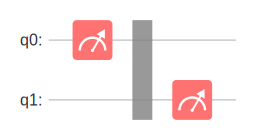

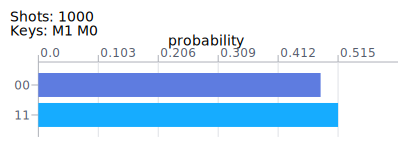

In [3]:
from mindquantum.simulator import Simulator
from mindquantum.core.gates import X, CNOT, H, Measure, BarrierGate, BARRIER
from mindquantum.core.circuit import Circuit
from IPython.display import display_svg

sim = Simulator("mqvector", 2)

sim.apply_gate(H.on(0))
sim.apply_gate(CNOT.on(1, 0))
print(sim.get_qs(True))

circ = Circuit()
circ += Measure("M0").on(0)
circ += BarrierGate(True)
# circ += BARRIER
circ += Measure("M1").on(1)
display_svg(circ.svg()) # 代码块内部调用 .svg() 要使用 display_svg

res = sim.sampling(circuit=circ, shots=1000)
res.svg() # jupyter notebook 代码块最后一行可以直接使用 .svg() 渲染

> API 解释：
> 
> - `BarrierGate(True)` 是一种特殊的门，本质上它什么计算都不做，只是在打印出线路时强制对齐，插入一个栅栏将左右分隔开，如果参数是 `True`，打印时打印出来，如果是 `False`，不打印出来（相当于插入 `BARRIER`）；
> - 打印量子线路的方法：
>   - `print(circ)`：将量子线路以字符串的形式输出；
>   - `circ.svg()`：在 jupyter notebook 的环境中，MindQuantum 的很多类型都可以调用 `.svg()` 来实现更漂亮的输出，例如：`Circuit`、`MeasureResult` 等等。调用 `.svg()` 必需在代码块的末尾，如果想在代码块中间调用，需要使用 `IPython.display.display_svg` 函数。

In [4]:
from show_info import InfoTable

InfoTable('mindquantum', 'numpy', 'matplotlib')

# 习题

## Exercise 1

对 $|\psi\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}$ 的两个比特进行测量。
